## DowJonesIndustrialAverage Sentiment Analysis

## Sentiment Analysis

Sentiment analysis is basically the process of determining the attitude or the emotion of the writer, i.e., whether it is positive or negative or neutral.

#### Importing the Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from textblob import TextBlob
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score,classification_report
%matplotlib inline

Ignoring Warnings in Python

In [2]:
import warnings
warnings.filterwarnings("ignore")

### Importing the Data Set

In [3]:
djia_news = pd.read_csv('DowJonesIndustrialAverage.csv')

### Reading the Data Set and  Setting to Read the Max Columns and Max Numbers in Rows

In [4]:
pd.options.display.float_format = '{:.10f}'.format
pd.set_option('display.max_columns',None)
djia_news.head(3)

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,Top10,Top11,Top12,Top13,Top14,Top15,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",b'Georgian troops retreat from S. Osettain cap...,b'Did the U.S. Prep Georgia for War with Russia?',b'Rice Gives Green Light for Israel to Attack ...,b'Announcing:Class Action Lawsuit on Behalf of...,"b""So---Russia and Georgia are at war and the N...","b""China tells Bush to stay out of other countr...",b'Did World War III start today?',b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,b'Welcome To World War IV! Now In High Definit...,"b""Georgia's move, a mistake of monumental prop...",b'Russia presses deeper into Georgia; U.S. say...,b'Abhinav Bindra wins first ever Individual Ol...,b' U.S. ship heads for Arctic to define territ...,b'Drivers in a Jerusalem taxi station threaten...,b'The French Team is Stunned by Phelps and the...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...","b""The US military was surprised by the timing ...",b'U.S. Beats War Drum as Iran Dumps the Dollar',"b'Gorbachev: ""Georgian military attacked the S...",b'CNN use footage of Tskhinvali ruins to cover...,b'Beginning a war as the Olympics were opening...,b'55 pyramids as large as the Luxor stacked in...,b'The 11 Top Party Cities in the World',b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."


### Importing the DowJonesIndustrialAverage Index Prices from Yfinance

In [5]:
djia_prices = yf.download('^DJI',start = '2008-08-09', end = '2016-07-02')

[*********************100%***********************]  1 of 1 completed


#### Reading the Data first five rows of the data

In [6]:
djia_prices.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2008-08-08,11432.0898437500,11759.9599609375,11388.0400390625,11734.3203125000,11734.3203125000,212830000
2008-08-11,11729.6699218750,11867.1103515625,11675.5302734375,11782.3496093750,11782.3496093750,183190000
2008-08-12,11781.7001953125,11782.3496093750,11601.5195312500,11642.4697265625,11642.4697265625,173590000
2008-08-13,11632.8095703125,11633.7802734375,11453.3398437500,11532.9599609375,11532.9599609375,182550000
2008-08-14,11532.0703125000,11718.2802734375,11450.8896484375,11615.9296875000,11615.9296875000,159790000


## Data Cleaning

Setting Date object column as the DateTime

In [7]:
djia_news['Date'] = pd.to_datetime(djia_news['Date'])

Checking the Shape and Data types of the DowJonesIndustrialAverage News Data Set

Shape of the Data Set

In [8]:
djia_news.shape

(1989, 27)

Data Types of the Data Set

In [9]:
djia_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1989 entries, 0 to 1988
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1989 non-null   datetime64[ns]
 1   Label   1989 non-null   int64         
 2   Top1    1989 non-null   object        
 3   Top2    1989 non-null   object        
 4   Top3    1989 non-null   object        
 5   Top4    1989 non-null   object        
 6   Top5    1989 non-null   object        
 7   Top6    1989 non-null   object        
 8   Top7    1989 non-null   object        
 9   Top8    1989 non-null   object        
 10  Top9    1989 non-null   object        
 11  Top10   1989 non-null   object        
 12  Top11   1989 non-null   object        
 13  Top12   1989 non-null   object        
 14  Top13   1989 non-null   object        
 15  Top14   1989 non-null   object        
 16  Top15   1989 non-null   object        
 17  Top16   1989 non-null   object        
 18  Top17   

Resetting the Date Index column for DowJonesIndustrialAverage Index Prices

In [10]:
djia_prices.reset_index(inplace=True)

Checking the Shape and Data types of the DowJonesIndustrialAverage Prices Data Set

In [11]:
djia_prices.shape

(1989, 7)

In [12]:
djia_prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1989 entries, 0 to 1988
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1989 non-null   datetime64[ns]
 1   Open       1989 non-null   float64       
 2   High       1989 non-null   float64       
 3   Low        1989 non-null   float64       
 4   Close      1989 non-null   float64       
 5   Adj Close  1989 non-null   float64       
 6   Volume     1989 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 108.9 KB


### Merging the Dow Jones Industrial Average News and Prices Data Sets

In [13]:
DJIA = djia_news.merge(djia_prices,how='inner',on='Date')

Reading the First five rows of the Merge Data Set

In [14]:
DJIA.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,Top10,Top11,Top12,Top13,Top14,Top15,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25,Open,High,Low,Close,Adj Close,Volume
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",b'Georgian troops retreat from S. Osettain cap...,b'Did the U.S. Prep Georgia for War with Russia?',b'Rice Gives Green Light for Israel to Attack ...,b'Announcing:Class Action Lawsuit on Behalf of...,"b""So---Russia and Georgia are at war and the N...","b""China tells Bush to stay out of other countr...",b'Did World War III start today?',b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge""",11432.0898437500,11759.9599609375,11388.0400390625,11734.3203125000,11734.3203125000,212830000
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,b'Welcome To World War IV! Now In High Definit...,"b""Georgia's move, a mistake of monumental prop...",b'Russia presses deeper into Georgia; U.S. say...,b'Abhinav Bindra wins first ever Individual Ol...,b' U.S. ship heads for Arctic to define territ...,b'Drivers in a Jerusalem taxi station threaten...,b'The French Team is Stunned by Phelps and the...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo...",11729.6699218750,11867.1103515625,11675.5302734375,11782.3496093750,11782.3496093750,183190000
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...","b""The US military was surprised by the timing ...",b'U.S. Beats War Drum as Iran Dumps the Dollar',"b'Gorbachev: ""Georgian military attacked the S...",b'CNN use footage of Tskhinvali ruins to cover...,b'Beginning a war as the Olympics were opening...,b'55 pyramids as large as the Luxor stacked in...,b'The 11 Top Party Cities in the World',b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b

Checking the Shape and Data types of the Merge Data Set

In [15]:
DJIA.shape

(1989, 33)

In [16]:
DJIA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1989 entries, 0 to 1988
Data columns (total 33 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1989 non-null   datetime64[ns]
 1   Label      1989 non-null   int64         
 2   Top1       1989 non-null   object        
 3   Top2       1989 non-null   object        
 4   Top3       1989 non-null   object        
 5   Top4       1989 non-null   object        
 6   Top5       1989 non-null   object        
 7   Top6       1989 non-null   object        
 8   Top7       1989 non-null   object        
 9   Top8       1989 non-null   object        
 10  Top9       1989 non-null   object        
 11  Top10      1989 non-null   object        
 12  Top11      1989 non-null   object        
 13  Top12      1989 non-null   object        
 14  Top13      1989 non-null   object        
 15  Top14      1989 non-null   object        
 16  Top15      1989 non-null   object        


## Data Analysis and Visualization

Checking for the NaN values in the Data Set

In [17]:
DJIA.isnull().sum()

Date         0
Label        0
Top1         0
Top2         0
Top3         0
Top4         0
Top5         0
Top6         0
Top7         0
Top8         0
Top9         0
Top10        0
Top11        0
Top12        0
Top13        0
Top14        0
Top15        0
Top16        0
Top17        0
Top18        0
Top19        0
Top20        0
Top21        0
Top22        0
Top23        1
Top24        3
Top25        3
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

As we observed that there NaN values in the Columns Top 23 ,Top 24, Top25.

Note - We can't drop the rows having the NaN values, as we can loose the Other columns and Row information. 

Filling the NaN values with the word 'NaN'

In [18]:
DJIA.fillna('NaN',axis = 1,inplace = True)

In [19]:
DJIA.isnull().sum()

Date         0
Label        0
Top1         0
Top2         0
Top3         0
Top4         0
Top5         0
Top6         0
Top7         0
Top8         0
Top9         0
Top10        0
Top11        0
Top12        0
Top13        0
Top14        0
Top15        0
Top16        0
Top17        0
Top18        0
Top19        0
Top20        0
Top21        0
Top22        0
Top23        0
Top24        0
Top25        0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

There are no NaN values in the Columns Top 23 ,Top 24, Top25.

Visualizing the Dow Jones Industrial Average Merge Data Set for any Missing Values

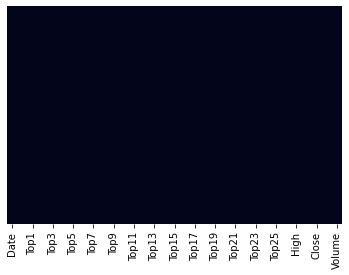

In [20]:
sns.heatmap(DJIA.isnull(),yticklabels=False,cbar=False);

There are no NaN values in the Entire Data Set

Basic stats for Dow Jones Industrial Average Merge Data Set 

In [21]:
DJIA.describe()

,Label,Open,High,Low,Close,Adj Close,Volume
count,1989.0000000000,1989.0000000000,1989.0000000000,1989.0000000000,1989.0000000000,1989.0000000000,1989.0000000000
mean,0.5354449472,13459.1160484226,13541.3031728216,13372.9317277742,13463.0322547939,13463.0322547939,162810970.3368526995
std,0.4988674957,3143.2816340024,3136.2717252357,3150.4209343356,3144.0069957722,3144.0069957722,93923426.6761234403
min,0.0000000000,6547.0097656250,6709.6098632812,6469.9501953125,6547.0498046875,6547.0498046875,8410000.0000000000
25%,0.0000000000,10907.3398437500,11000.9804687500,10824.7597656250,10913.3798828125,10913.3798828125,100000000.0000000000
50%,1.0000000000,13022.0498046875,13088.1103515625,12953.1298828125,13025.5800781250,13025.5800781250,135170000.0000000000
75%,1.0000000000,16477.6992187500,16550.0703125000,16392.7695312500,16478.4101562500,16478.4101562500,192600000.0000000000
max,1.0000000000,18315.0605468750,18351.3593750000,18272.5605468750,18312.3906250000,18312.3906250000,674920000.0000000000


Plotting the Change in Index price over time

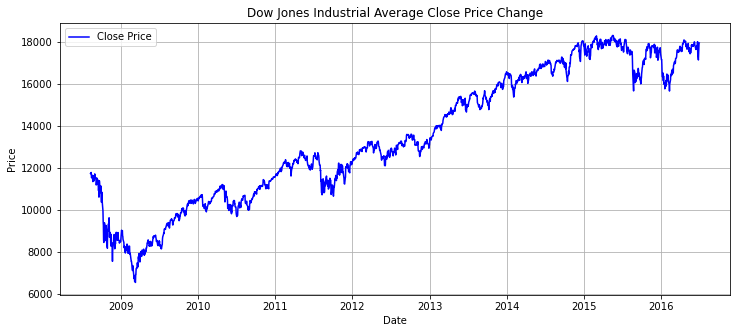

In [22]:
plt.figure(figsize=(12,5))
plt.plot(DJIA['Date'],DJIA['Close'],color = 'blue')
plt.grid()
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(labels = ['Close Price'])
plt.title('Dow Jones Industrial Average Close Price Change')
plt.show()

Plotting the Volume

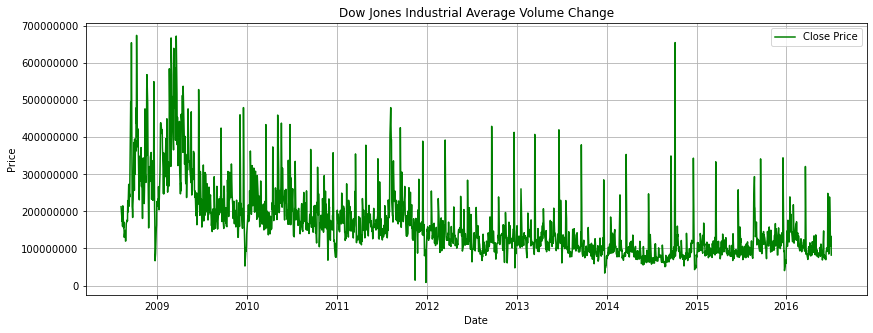

In [23]:
plt.figure(figsize=(14,5))
plt.plot(DJIA['Date'],DJIA['Volume'],color = 'green')
plt.grid()
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(labels = ['Close Price'])
plt.title('Dow Jones Industrial Average Volume Change')
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.show()

Daily return Dow Jones Industrial Average

In [24]:
Daily_Return = np.log(DJIA['Close']/DJIA['Close'].shift(1))

Reading the Daily Return of the Dow Jones Industrial Average

In [25]:
Daily_Return

0                NaN
1       0.0040847079
2      -0.0119430202
3      -0.0094505761
4       0.0071683854
            ...     
1984   -0.0150843797
1985    0.0155997822
1986    0.0162353004
1987    0.0132107312
1988    0.0010802260
Name: Close, Length: 1989, dtype: float64

Plotting the Daily return

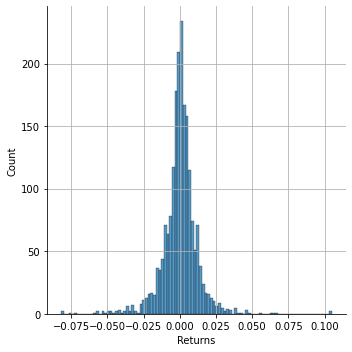

In [26]:
sns.displot(Daily_Return.dropna(),bins = 100)
plt.xlabel('Returns')
plt.grid()
plt.show()

## Data Cleaning 

Mergeing Every Single row into one Row

In [27]:
headlines = []

for row in range(0,len(DJIA.index)):
    headlines.append(' '.join(str(x) for x in DJIA.iloc[row,2:27]))

In [28]:
headlines[0]

'b"Georgia \'downs two Russian warplanes\' as countries move to brink of war" b\'BREAKING: Musharraf to be impeached.\' b\'Russia Today: Columns of troops roll into South Ossetia; footage from fighting (YouTube)\' b\'Russian tanks are moving towards the capital of South Ossetia, which has reportedly been completely destroyed by Georgian artillery fire\' b"Afghan children raped with \'impunity,\' U.N. official says - this is sick, a three year old was raped and they do nothing" b\'150 Russian tanks have entered South Ossetia whilst Georgia shoots down two Russian jets.\' b"Breaking: Georgia invades South Ossetia, Russia warned it would intervene on SO\'s side" b"The \'enemy combatent\' trials are nothing but a sham: Salim Haman has been sentenced to 5 1/2 years, but will be kept longer anyway just because they feel like it." b\'Georgian troops retreat from S. Osettain capital, presumably leaving several hundred people killed. [VIDEO]\' b\'Did the U.S. Prep Georgia for War with Russia?\'

Cleaning the Headlines(i.e., removing the (' , ",\) etc)

In [29]:
clean_headlines = []
for i in range(0,len(headlines)):
    clean_headlines.append(re.sub("b[(')]", '', headlines[i])) #Removes b with single quote(')
    clean_headlines[i] = re.sub('b[(")]', '', clean_headlines[i]) #Removes b with single quote(")
    clean_headlines[i] = re.sub("\'", '', clean_headlines[i]) #Removes (\)
    clean_headlines[i] = re.sub('[^a-zA-Z]',' ',clean_headlines[i]) #Removes everything except words
    clean_headlines[i] = clean_headlines[i].lower() # Every Word will be converted into lower case

Reading the Cleaned Headlines

In [30]:
print(clean_headlines[0])

georgia downs two russian warplanes as countries move to brink of war  breaking  musharraf to be impeached  russia today  columns of troops roll into south ossetia  footage from fighting  youtube  russian tanks are moving towards the capital of south ossetia  which has reportedly been completely destroyed by georgian artillery fire afghan children raped with impunity  u n  official says   this is sick  a three year old was raped and they do nothing      russian tanks have entered south ossetia whilst georgia shoots down two russian jets  breaking  georgia invades south ossetia  russia warned it would intervene on sos side  the enemy combatent trials are nothing but a sham  salim haman has been sentenced to       years  but will be kept longer anyway just because they feel like it   georgian troops retreat from s  osettain capital  presumably leaving several hundred people killed   video  did the u s  prep georgia for war with russia  rice gives green light for israel to attack iran  sa

Creating a Column "Combined_News" in the Dow Jones Industrial Average Data Set

In [31]:
DJIA['Combined_News'] = clean_headlines

Reading the Created Column

In [32]:
DJIA['Combined_News'][0]

'georgia downs two russian warplanes as countries move to brink of war  breaking  musharraf to be impeached  russia today  columns of troops roll into south ossetia  footage from fighting  youtube  russian tanks are moving towards the capital of south ossetia  which has reportedly been completely destroyed by georgian artillery fire afghan children raped with impunity  u n  official says   this is sick  a three year old was raped and they do nothing      russian tanks have entered south ossetia whilst georgia shoots down two russian jets  breaking  georgia invades south ossetia  russia warned it would intervene on sos side  the enemy combatent trials are nothing but a sham  salim haman has been sentenced to       years  but will be kept longer anyway just because they feel like it   georgian troops retreat from s  osettain capital  presumably leaving several hundred people killed   video  did the u s  prep georgia for war with russia  rice gives green light for israel to attack iran  s

In [33]:
DJIA.head(3)

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,Top10,Top11,Top12,Top13,Top14,Top15,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25,Open,High,Low,Close,Adj Close,Volume,Combined_News
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",b'Georgian troops retreat from S. Osettain cap...,b'Did the U.S. Prep Georgia for War with Russia?',b'Rice Gives Green Light for Israel to Attack ...,b'Announcing:Class Action Lawsuit on Behalf of...,"b""So---Russia and Georgia are at war and the N...","b""China tells Bush to stay out of other countr...",b'Did World War III start today?',b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge""",11432.0898437500,11759.9599609375,11388.0400390625,11734.3203125000,11734.3203125000,212830000,georgia downs two russian warplanes as countri...
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,b'Welcome To World War IV! Now In High Definit...,"b""Georgia's move, a mistake of monumental prop...",b'Russia presses deeper into Georgia; U.S. say...,b'Abhinav Bindra wins first ever Individual Ol...,b' U.S. ship heads for Arctic to define territ...,b'Drivers in a Jerusalem taxi station threaten...,b'The French Team is Stunned by Phelps and the...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo...",11729.6699218750,11867.1103515625,11675.5302734375,11782.3496093750,11782.3496093750,183190000,why wont america and nato help us if they won...
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...","b""The US military was surprised by the timing ...",b'U.S. Beats War Drum as Iran Dumps the Dollar',"b'Gorbachev: ""Georgian military attacked the S...",b'CNN use footage of Tskhinvali ruins to cover...,b'Beginning a war as the Olympics were opening...,b'55 pyramids as large as the Luxor stacked in...,b'The 11 Top Party Cities in the World',b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli 

Creating the Functions "Subjectvity and Polarity"

The sentiment function of textblob returns two properties, polarity, and subjectivity.

## Subjectivity

Subjective sentences generally refer to personal opinion, emotion or judgment whereas objective refers to factual information. Subjectivity is also a float which lies in the range of [0,1].

## Polarity

Polarity is float which lies in the range of [-1,1] where 1 means positive statement and -1 means a negative statement.

In [34]:
def getsubjectivity(text):
    return TextBlob(text).sentiment.subjectivity
def getpolarity(text):
    return TextBlob(text).sentiment.polarity
def sentcorrect(text):
    return TextBlob.correct(text)

In [35]:
DJIA['Subjectivity'] = DJIA['Combined_News'].apply(getsubjectivity)
DJIA['Polarity'] = DJIA['Combined_News'].apply(getpolarity)

### Reading the Data Set

In [36]:
DJIA.head(3)

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,Top10,Top11,Top12,Top13,Top14,Top15,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25,Open,High,Low,Close,Adj Close,Volume,Combined_News,Subjectivity,Polarity
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",b'Georgian troops retreat from S. Osettain cap...,b'Did the U.S. Prep Georgia for War with Russia?',b'Rice Gives Green Light for Israel to Attack ...,b'Announcing:Class Action Lawsuit on Behalf of...,"b""So---Russia and Georgia are at war and the N...","b""China tells Bush to stay out of other countr...",b'Did World War III start today?',b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge""",11432.0898437500,11759.9599609375,11388.0400390625,11734.3203125000,11734.3203125000,212830000,georgia downs two russian warplanes as countri...,0.2675486391,-0.0485681943
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,b'Welcome To World War IV! Now In High Definit...,"b""Georgia's move, a mistake of monumental prop...",b'Russia presses deeper into Georgia; U.S. say...,b'Abhinav Bindra wins first ever Individual Ol...,b' U.S. ship heads for Arctic to define territ...,b'Drivers in a Jerusalem taxi station threaten...,b'The French Team is Stunned by Phelps and the...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo...",11729.6699218750,11867.1103515625,11675.5302734375,11782.3496093750,11782.3496093750,183190000,why wont america and nato help us if they won...,0.3748059543,0.1093248272
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...","b""The US military was surprised by the timing ...",b'U.S. Beats War Drum as Iran Dumps the Dollar',"b'Gorbachev: ""Georgian military attacked the S...",b'CNN use footage of Tskhinvali ruins to cover...,b'Beginning a war as the Olympics were opening...,b'55 pyramids as large as the Luxor stacked in...,b'The 11 Top Party Cities in the World',b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Rem

## VADER Sentiment Analysis

VADER (Valence Aware Dictionary and sentiment Reasoner) is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media.

Creating a Function to get a Positivity and Negativity score

In [37]:
def getSIA(text):
    sia = SentimentIntensityAnalyzer()
    sentiment = sia.polarity_scores(text)
    return sentiment

Creating the Empty Lists to store the scores

In [38]:
compound = []
neg = []
neu = []
pos = []

for i in range(0,len(DJIA['Combined_News'])):
    SIA = getSIA(DJIA['Combined_News'][i])
    compound.append(SIA['compound'])
    neg.append(SIA['neg'])
    pos.append(SIA['pos'])
    neu.append(SIA['neu'])

In [39]:
DJIA['Compound'] = compound
DJIA['Negative'] = neg
DJIA['Positive'] = pos
DJIA['Neutral'] = neu

### Reading the Scores

In [40]:
DJIA.head(3)

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,Top10,Top11,Top12,Top13,Top14,Top15,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25,Open,High,Low,Close,Adj Close,Volume,Combined_News,Subjectivity,Polarity,Compound,Negative,Positive,Neutral
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",b'Georgian troops retreat from S. Osettain cap...,b'Did the U.S. Prep Georgia for War with Russia?',b'Rice Gives Green Light for Israel to Attack ...,b'Announcing:Class Action Lawsuit on Behalf of...,"b""So---Russia and Georgia are at war and the N...","b""China tells Bush to stay out of other countr...",b'Did World War III start today?',b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge""",11432.0898437500,11759.9599609375,11388.0400390625,11734.3203125000,11734.3203125000,212830000,georgia downs two russian warplanes as countri...,0.2675486391,-0.0485681943,-0.9982000000,0.2350000000,0.0410000000,0.7240000000
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,b'Welcome To World War IV! Now In High Definit...,"b""Georgia's move, a mistake of monumental prop...",b'Russia presses deeper into Georgia; U.S. say...,b'Abhinav Bindra wins first ever Individual Ol...,b' U.S. ship heads for Arctic to define territ...,b'Drivers in a Jerusalem taxi station threaten...,b'The French Team is Stunned by Phelps and the...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo...",11729.6699218750,11867.1103515625,11675.5302734375,11782.3496093750,11782.3496093750,183190000,why wont america and nato help us if they won...,0.3748059543,0.1093248272,-0.9838000000,0.1870000000,0.0890000000,0.7240000000
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...","b""The US military was surprised by the timing ...",b'U.S. Beats War Drum as Iran Dumps the Dollar',"b'Gorbachev: ""Georgian military attacked the S...",b'CNN use footage of Tskhinvali ruins to cover...,b'Beginning a war as the Olympics were opening...,b'55 pyramids as large as the Luxor stacked in...,b'The 11 Top Party Cities in the World',b'U.S. troops still in Georgia (did you know t...,b'Why R

Only keeping the Required Columns for the model

In [41]:
keep_columns = ['Open','High','Low','Close','Volume','Subjectivity','Polarity','Compound','Negative','Positive','Neutral','Label']

df = DJIA[keep_columns]

### Creating the Dependent variable(y) and Independent variable(x)

In [42]:
x = df
x = np.array(x.drop(['Label'],1))
y = np.array(df['Label'])

## Train/Test Split

The training set contains a known output and the model learns on this data in order to be generalized to other data later on.

The test dataset (or subset) in order to test our model’s prediction on this subset. 

The performance is measured using the test data.

In [43]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

Applying the Machine Learning Model

## Linear Discriminant Analysis

Linear Discriminant Analysis is a dimensionality reduction technique that is commonly used for supervised classification problems. It is used for modelling differences in groups i.e. separating two or more classes. It is used to project the features in higher dimension space into a lower dimension space. 

In [44]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [45]:
 model = LinearDiscriminantAnalysis(n_components=1).fit(x_train,y_train)

In [46]:
predictions = model.predict(x_test)
predictions

array([1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,

Model Accuracy and Classification Report

In [47]:
from sklearn.metrics import accuracy_score,classification_report

In [48]:
score = accuracy_score(y_test,predictions)

In [49]:
score

0.9128978224455612

In [50]:
report = classification_report(y_test,predictions)
print(report)

              precision    recall  f1-score   support

           0       0.95      0.86      0.90       281
           1       0.89      0.96      0.92       316

    accuracy                           0.91       597
   macro avg       0.92      0.91      0.91       597
weighted avg       0.92      0.91      0.91       597

